In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [10]:
print(data.head())
print(data.info())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [12]:
data.columns = data.columns.str.strip()

In [14]:
data['Date'] = data['Date'].str.strip()

In [16]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [18]:
print(data.isnull().sum())


Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64


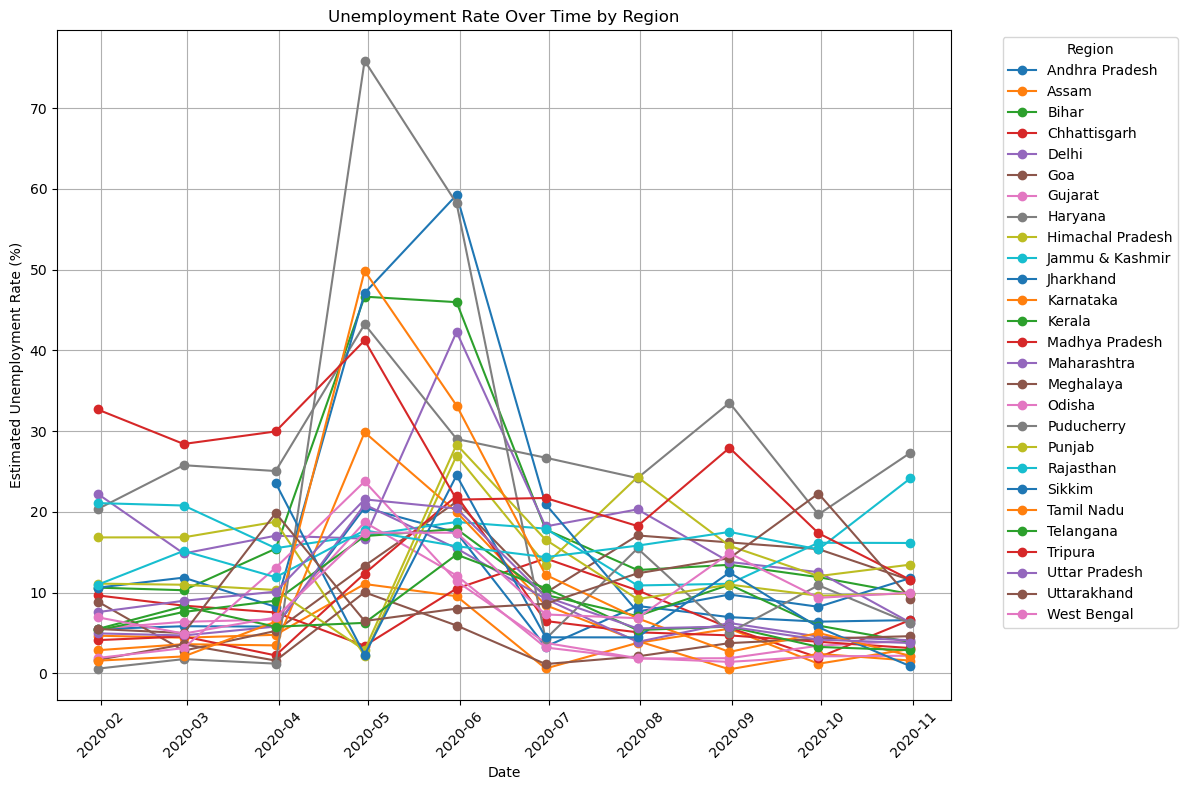

In [20]:
# Group data by Region and plot each region's unemployment rate over time
regions = data['Region'].unique()

plt.figure(figsize=(12, 8))

for region in regions:
    region_data = data[data['Region'] == region]
    plt.plot(region_data['Date'], region_data['Estimated Unemployment Rate (%)'], marker='o', label=region)

plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

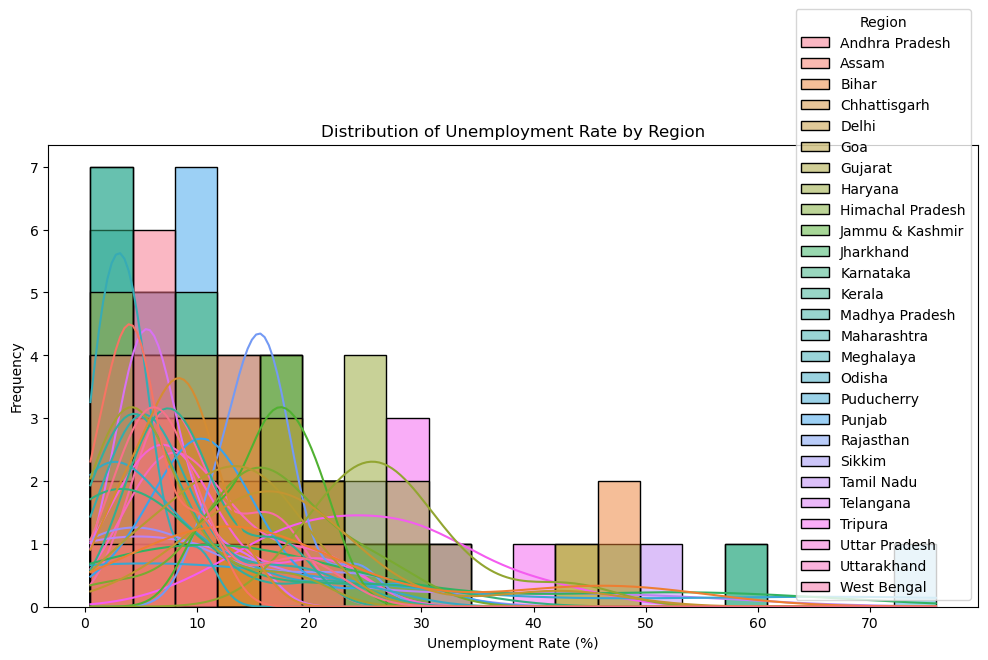

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Estimated Unemployment Rate (%)', hue='Region', kde=True, bins=20)
plt.title('Distribution of Unemployment Rate by Region')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Create 'Month-Year' column
data['Month-Year'] = data['Date'].dt.to_period('M')

# Check if the 'Month-Year' column was created successfully
print(data[['Date', 'Month-Year']].head())

        Date Month-Year
0 2020-01-31    2020-01
1 2020-02-29    2020-02
2 2020-03-31    2020-03
3 2020-04-30    2020-04
4 2020-05-31    2020-05


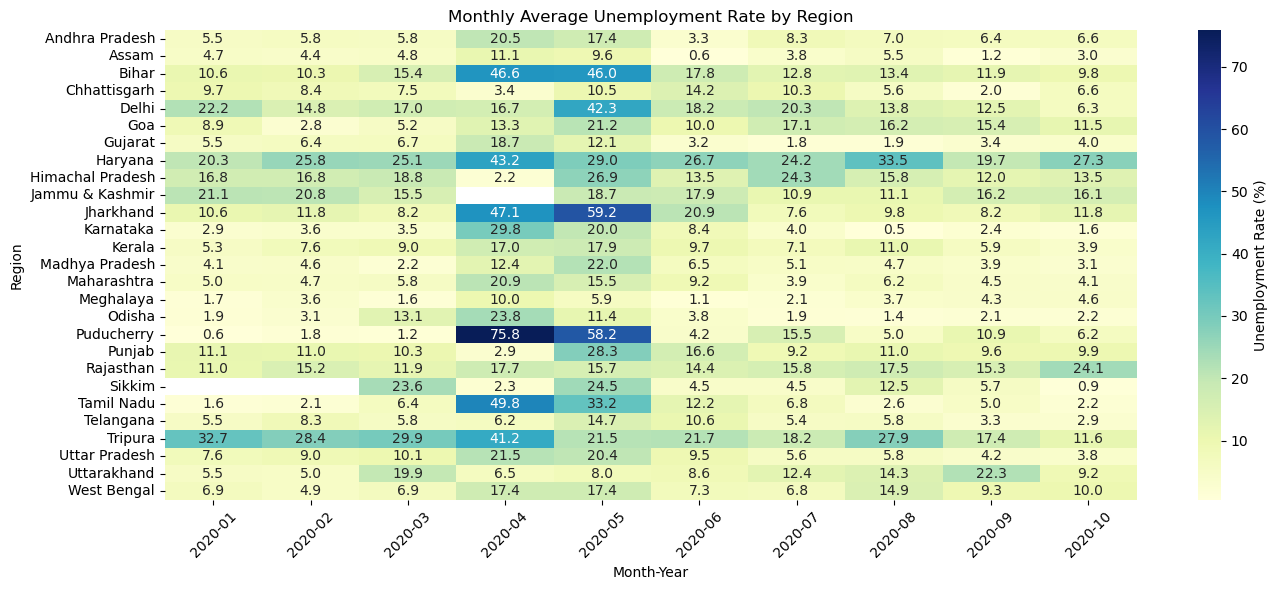

In [28]:
pivot_table = data.pivot_table(values='Estimated Unemployment Rate (%)', index='Region', columns='Month-Year', aggfunc='mean')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Unemployment Rate (%)'})
plt.title('Monthly Average Unemployment Rate by Region')
plt.xlabel('Month-Year')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\j\AppData\Local\Temp\ipykernel_9996\145293667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_unemployment_rate, x='Region', y='Estimated Unemployment Rate (%)', palette='viridis')


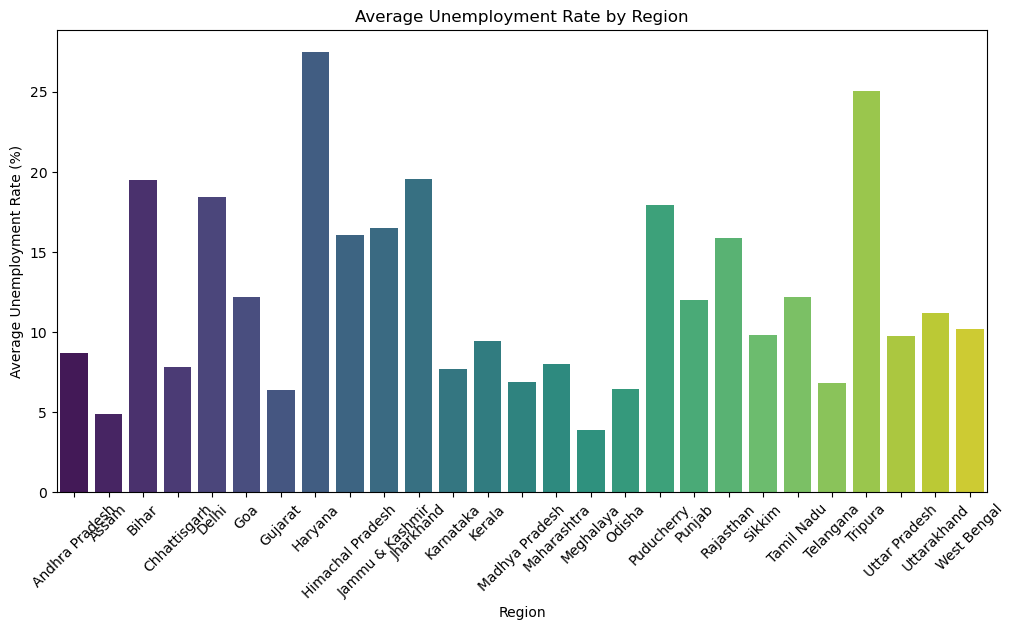

In [40]:
avg_unemployment_rate = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_unemployment_rate, x='Region', y='Estimated Unemployment Rate (%)', palette='viridis')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()